<a href="https://colab.research.google.com/github/GeorgeNishanth/NG/blob/main/ImageGeneration_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


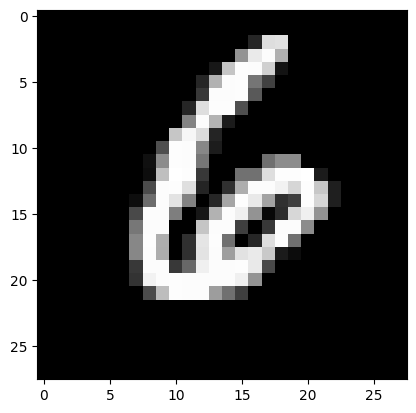

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

# Set TensorFlow logging level
tf.get_logger().setLevel('ERROR')

# Reset the default graph (for TensorFlow 2.x)
tf.compat.v1.reset_default_graph()

# Load the MNIST dataset using Keras
(x_train, _), (_, _) = mnist.load_data()

# Normalize the data to [0, 1]
x_train = x_train / 255.0

# Display the 14th image (index 13)
plt.imshow(x_train[13], cmap="gray")
plt.show()


In [ ]:
def generator(z,reuse=None):

    with tf.variable_scope('generator',reuse=reuse):

        hidden1 = tf.layers.dense(inputs=z,units=128,activation=tf.nn.leaky_relu)
        hidden2 = tf.layers.dense(inputs=hidden1,units=128,activation=tf.nn.leaky_relu)
        output = tf.layers.dense(inputs=hidden2,units=784,activation=tf.nn.tanh)

        return output

In [ ]:
def discriminator(X,reuse=None):

    with tf.variable_scope('discriminator',reuse=reuse):

        hidden1 = tf.layers.dense(inputs=X,units=128,activation=tf.nn.leaky_relu)
        hidden2 = tf.layers.dense(inputs=hidden1,units=128,activation=tf.nn.leaky_relu)
        logits = tf.layers.dense(inputs=hidden2,units=1)
        output = tf.sigmoid(logits)

        return logits

In [ ]:
import tensorflow as tf

# Define input shapes using Keras layers (instead of placeholders)
x = tf.keras.Input(shape=(784,))  # Input for images (28x28 flattened)
z = tf.keras.Input(shape=(100,))  # Input for random noise

# Continue defining your model here...


In [ ]:
import tensorflow as tf

# Define the generator model using Keras
class Generator(tf.keras.Model):
    def __init__(self):
        super(Generator, self).__init__()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dense2 = tf.keras.layers.Dense(784, activation='sigmoid')  # Output layer (flattened 28x28)

    def call(self, z):
        x = self.dense1(z)
        fake_x = self.dense2(x)
        return fake_x

# Instantiate the generator model
generator = Generator()

# Pass noise vector 'z' through the generator
fake_x = generator(z)


In [ ]:
import tensorflow as tf

# Define the discriminator model using Keras
class Discriminator(tf.keras.Model):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.dense1 = tf.keras.layers.Dense(128, activation=tf.nn.leaky_relu)
        self.dense2 = tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer (real or fake)

    def call(self, X):
        x = self.dense1(X)
        D_logits_real = self.dense2(x)
        return D_logits_real

# Instantiate the discriminator model
discriminator = Discriminator()

# Pass real image 'x' through the discriminator
D_logits_real = discriminator(x)


In [ ]:
# Pass fake image 'fake_x' through the discriminator (no need for 'reuse')
D_logits_fake = discriminator(fake_x)


In [ ]:
import tensorflow as tf

# Assuming the discriminator is defined using tf.keras.Model
class Discriminator(tf.keras.Model):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.dense1 = tf.keras.layers.Dense(128, activation=tf.nn.leaky_relu)
        self.dense2 = tf.keras.layers.Dense(1, activation=None)  # Logits (no activation on output)

    def call(self, X):
        x = self.dense1(X)
        D_logits_real = self.dense2(x)
        return D_logits_real

# Instantiate the discriminator model
discriminator = Discriminator()

# Ensure x is a tf.Tensor (real images)
# Example: Assuming x is your input image tensor
x = tf.random.normal([32, 784])  # Example real images batch (32 examples, 784 features)

# Ensure D_logits_real is a TensorFlow tensor
D_logits_real = discriminator(x)  # Pass the input x (real images)

# Compute the discriminator loss for real images
@tf.function
def compute_D_loss_real(D_logits_real):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=D_logits_real,
        labels=tf.ones_like(D_logits_real)  # Labels are 1 for real images
    ))

# Call the loss function
D_loss_real = compute_D_loss_real(D_logits_real)

print(D_loss_real)


tf.Tensor(0.99562377, shape=(), dtype=float32)


In [ ]:
import tensorflow as tf

# Define your Discriminator model
class Discriminator(tf.keras.Model):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.dense1 = tf.keras.layers.Dense(128, activation=tf.nn.leaky_relu)
        self.dense2 = tf.keras.layers.Dense(1, activation=None)  # Logits (no activation on output)

    def call(self, X):
        x = self.dense1(X)
        D_logits_fake = self.dense2(x)
        return D_logits_fake

# Instantiate the discriminator model
discriminator = Discriminator()

# Create input tensor for fake images
# Example: Assuming z is the input noise tensor
z = tf.random.normal([32, 100])  # Example batch size of 32, noise vector of size 100

# Generate fake images using the generator (example fake_x)
fake_x = generator(z)  # Assuming you have a generator model

# Pass the fake images through the discriminator
D_logits_fake = discriminator(fake_x)  # This will give the logits for fake images

# Compute the discriminator loss for fake images
@tf.function
def compute_D_loss_fake(D_logits_fake):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=D_logits_fake,
        labels=tf.zeros_like(D_logits_fake)  # Labels are 0 for fake images
    ))

# Call the loss function
D_loss_fake = compute_D_loss_fake(D_logits_fake)

print(D_loss_fake)


tf.Tensor(1.0662465, shape=(), dtype=float32)


In [ ]:
 D_loss_real + D_loss_fake

<tf.Tensor: shape=(), dtype=float32, numpy=2.0618703>

In [ ]:
G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    logits=D_logits_fake,
    labels=tf.ones_like(D_logits_fake)  # Generator wants the fake images to be classified as real
))


In [ ]:
# Get the trainable variables for the generator and discriminator
theta_D = [var for var in discriminator.trainable_variables if 'dis' in var.name]
theta_G = [var for var in generator.trainable_variables if 'gen' in var.name]


In [ ]:
import tensorflow as tf

# Assume generator and discriminator are defined as tf.keras.Model instances
generator = ...  # Your generator model definition here
discriminator = ...  # Your discriminator model definition here

# Define optimizers
D_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
G_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Training step function using GradientTape
@tf.function
def training_step(real_images, noise):
    with tf.GradientTape() as disc_tape, tf.GradientTape() as gen_tape:
        # Generate fake images from noise
        fake_images = generator(noise, training=True)

        # Discriminator outputs
        D_logits_real = discriminator(real_images, training=True)
        D_logits_fake = discriminator(fake_images, training=True)

        # Calculate losses
        D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
            logits=D_logits_real, labels=tf.ones_like(D_logits_real)
        ))
        D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
            logits=D_logits_fake, labels=tf.zeros_like(D_logits_fake)
        ))
        D_loss = D_loss_real + D_loss_fake

        G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
            logits=D_logits_fake, labels=tf.ones_like(D_logits_fake)
        ))

    # Calculate gradients
    D_gradients = disc_tape.gradient(D_loss, discriminator.trainable_variables)
    G_gradients = gen_tape.gradient(G_loss, generator.trainable_variables)

    # Apply gradients
    D_optimizer.apply_gradients(zip(D_gradients, discriminator.trainable_variables))
    G_optimizer.apply_gradients(zip(G_gradients, generator.trainable_variables))


In [ ]:
# Use TensorFlow 2.x compatible initializer
init = tf.compat.v1.global_variables_initializer()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:681: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch: 0, Discriminator Loss: 1.9130250166199403e-06, Generator Loss: 13.887944221496582


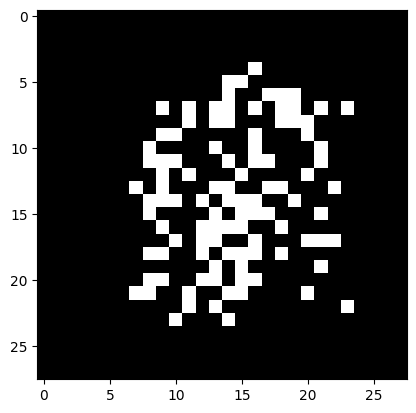

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Set training parameters
batch_size = 100
num_epochs = 1000
z_dim = 100
image_dim = 784  # 28x28 flattened

# Define the generator model
def build_generator(z_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=(z_dim,)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(image_dim, activation='tanh')  # Use 'tanh' activation for [-1, 1] output
    ])
    return model

# Define the discriminator model
def build_discriminator(image_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1024, activation='relu', input_shape=(image_dim,)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Instantiate the generator and discriminator
generator = build_generator(z_dim)
discriminator = build_discriminator(image_dim)

# Loss function and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
D_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
G_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Loss functions for discriminator and generator
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Training function without @tf.function (for eager execution)
def train_step(real_images):
    noise = tf.random.uniform([batch_size, z_dim], -1.0, 1.0)

    with tf.GradientTape() as d_tape, tf.GradientTape() as g_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(generated_images, training=True)

        d_loss = discriminator_loss(real_output, fake_output)
        g_loss = generator_loss(fake_output)

    # Calculate gradients for both discriminator and generator
    d_gradients = d_tape.gradient(d_loss, discriminator.trainable_variables)
    g_gradients = g_tape.gradient(g_loss, generator.trainable_variables)

    # Apply gradients using the Adam optimizer
    D_optimizer.apply_gradients(zip(d_gradients, discriminator.trainable_variables))
    G_optimizer.apply_gradients(zip(g_gradients, generator.trainable_variables))

    return d_loss, g_loss, generated_images

# Load and preprocess the MNIST dataset
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = (x_train.reshape(-1, image_dim) / 255.0) * 2 - 1  # Normalize to [-1, 1]

# Training loop
for epoch in range(num_epochs):
    # Shuffle and create batches for each epoch
    np.random.shuffle(x_train)
    num_batches = x_train.shape[0] // batch_size

    for i in range(num_batches):
        batch_images = x_train[i * batch_size: (i + 1) * batch_size]
        d_loss, g_loss, generated_images = train_step(batch_images)

    # Every 100 epochs, print the losses and generate an image
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Discriminator Loss: {d_loss}, Generator Loss: {g_loss}")

        # Generate and display a sample image
        noise = tf.random.uniform([1, z_dim], -1.0, 1.0)
        generated_image = generator(noise, training=False)  # Make sure to set training=False for inference

        # Convert the tensor to a numpy array and reshape for display
        plt.imshow(generated_image[0].numpy().reshape(28, 28), cmap='gray')
        plt.show()